<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/EXIT_EST_DSA_DECEMBER_2023BATCH_B2_Athulya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXIT TEST DSA DECEMBER 2023 BATCH**

*Problem Statement*:

Employee Attrition Prediction
Your task is to predict employee attrition using a given dataset. The dataset
includes various features related to employees, and the column names are selfexplanatory.


In [15]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import pickle

In [16]:
#data loading
data=pd.read_csv('/content/Employee.csv')

In [17]:
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [18]:
data.shape

(74498, 24)

#**Exploratory Data Analysis**

### Checking basic information

In [19]:
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

***data has 24 features and 74498 entries. Among that, 8 features are numerical (2 float and 6 integer) and 16 are categorical features.***

*Checking statistical summary*


In [21]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


*Checking for unique values*


In [22]:
(data.nunique()).sort_values(ascending=False)

Employee ID                 74498
Monthly Income               9842
Company Tenure                127
Distance from Home             99
Years at Company               51
Age                            42
Number of Dependents            7
Number of Promotions            5
Education Level                 5
Job Role                        5
Performance Rating              4
Job Satisfaction                4
Work-Life Balance               4
Company Reputation              4
Employee Recognition            4
Marital Status                  3
Job Level                       3
Company Size                    3
Overtime                        2
Gender                          2
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Attrition                       2
dtype: int64

***Feature 'Employee ID' has full of unique values.***

 *Check for duplicates*

In [23]:
data.duplicated().sum()

0

***There is no suplicates in the data***

*Check for null values*

In [24]:
data.isna().sum().sort_values(ascending=False)

Number of Dependents        6
Education Level             5
Number of Promotions        5
Job Level                   5
Work-Life Balance           4
Performance Rating          4
Marital Status              4
Remote Work                 3
Employee Recognition        2
Company Size                2
Company Reputation          0
Innovation Opportunities    0
Leadership Opportunities    0
Company Tenure              0
Employee ID                 0
Age                         0
Distance from Home          0
Overtime                    0
Job Satisfaction            0
Monthly Income              0
Job Role                    0
Years at Company            0
Gender                      0
Attrition                   0
dtype: int64

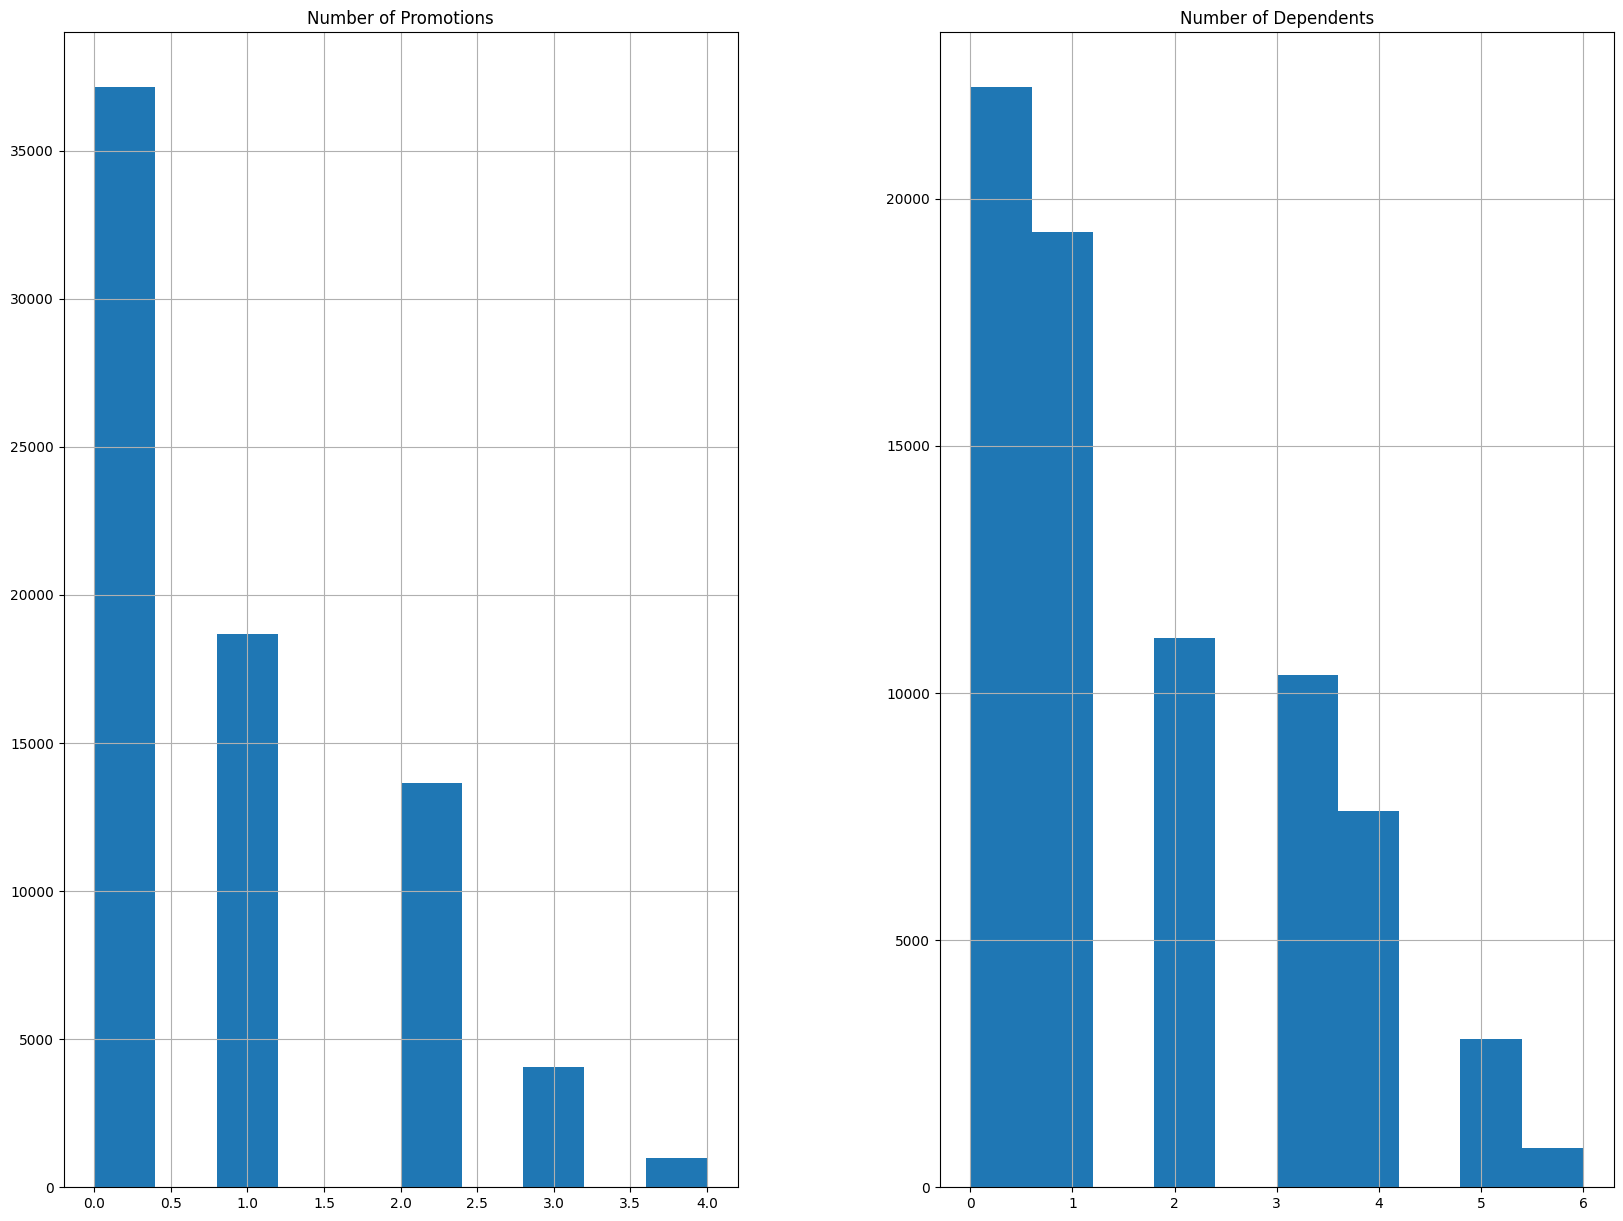

In [25]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [47]:
categorical_columns=['Education Level','Job Level','Work-Life Balance','Performance Rating','Marital Status','Remote Work','Employee Recognition','Employee Recognition','Company Size']
for item in categorical_columns:
    data[item]=data[item].fillna(value=data[item].mode()[0])

In [48]:
data['Number of Dependents'] = data['Number of Dependents'].fillna(data['Number of Dependents'].median())
data['Number of Promotions'] = data['Number of Promotions'].fillna(data['Number of Promotions'].median())


data.isna().sum()


Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

***All null values are imputed properly.***

*Checking for outliers*


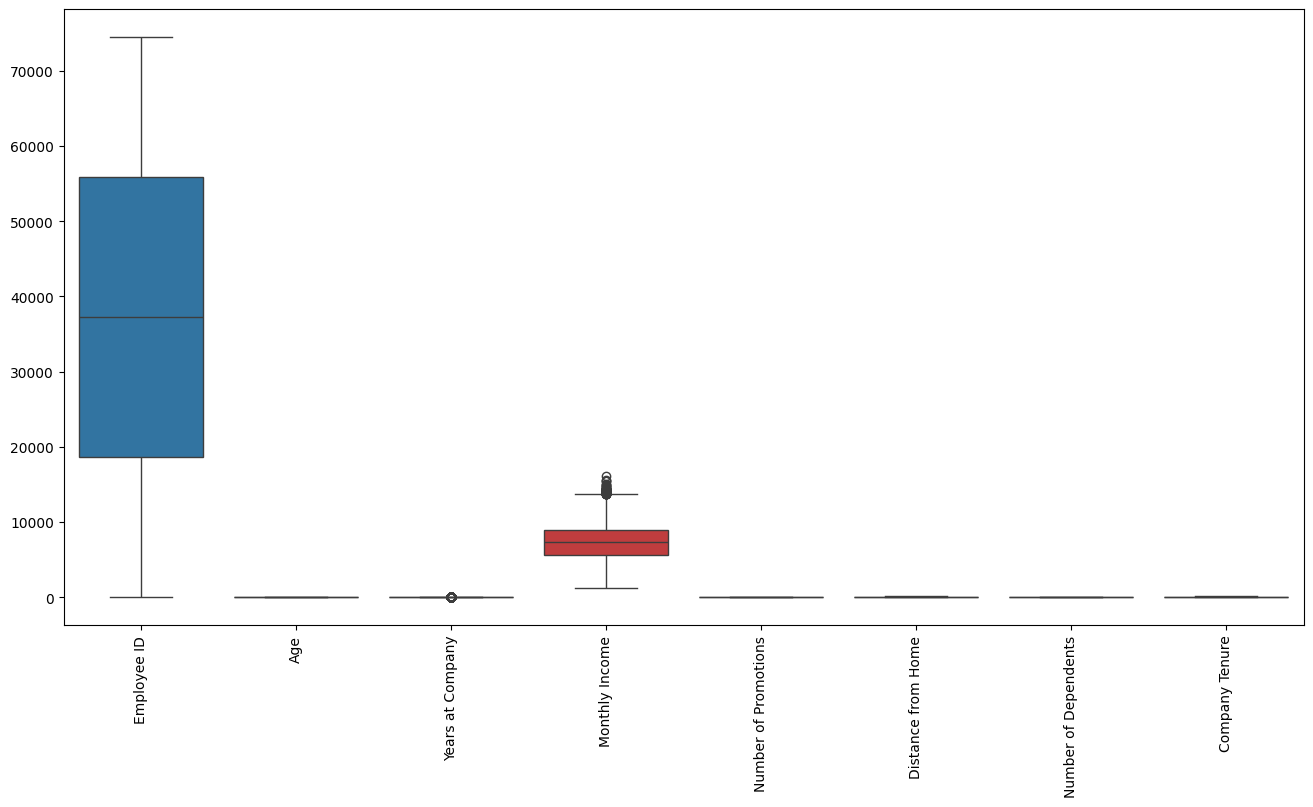

In [49]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(data)
plt.show()

In [62]:
numerical_features = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Number of Dependents', 'Job Level']
for feature in numerical_features:
    Q1 =data[feature].quantile(0.25)
    Q3 =data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers =data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"Outliers in {feature}:")
    print(outliers)

Outliers in Age:
Empty DataFrame
Columns: [Employee ID, Age, Gender, Years at Company, Job Role, Monthly Income, Work-Life Balance, Job Satisfaction, Performance Rating, Number of Promotions, Overtime, Distance from Home, Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Company Tenure, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition]
Index: []

[0 rows x 24 columns]
Outliers in Years at Company:
       Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
465           2745   58  Female                48  Technology            8460   
662          50335   57  Female                49   Education            5236   
843          53893   59    Male                49  Healthcare            8295   
1373         16371   56  Female                48       Media            5527   
1567         51541   59  Female                48       Media            6411   
...            

TypeError: unsupported operand type(s) for -: 'str' and 'str'

*Correlation*

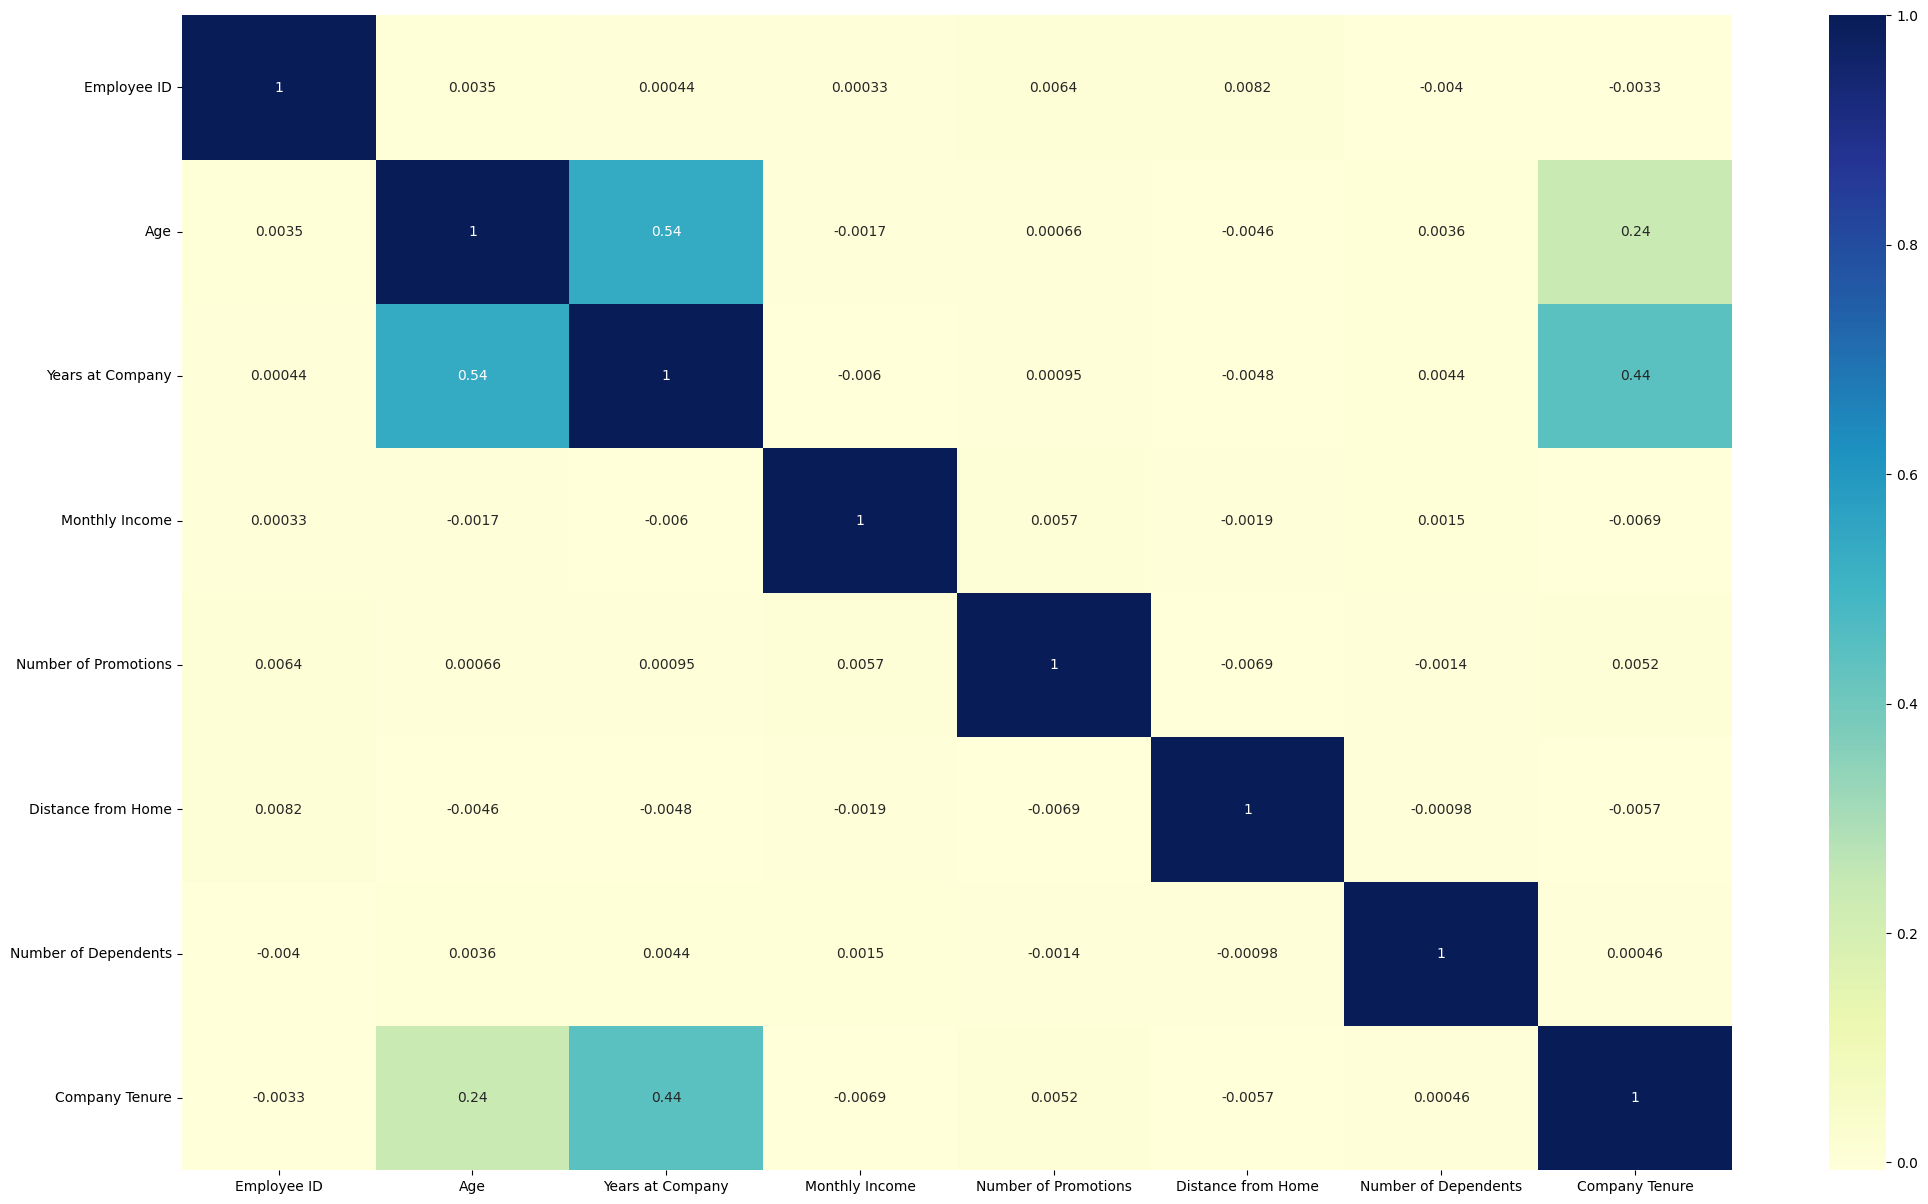

In [52]:
plt.figure(figsize=(25, 15))
sns.heatmap(data.select_dtypes(('float','int32','int64')).corr(),cmap='YlGnBu',annot=True)
plt.show()

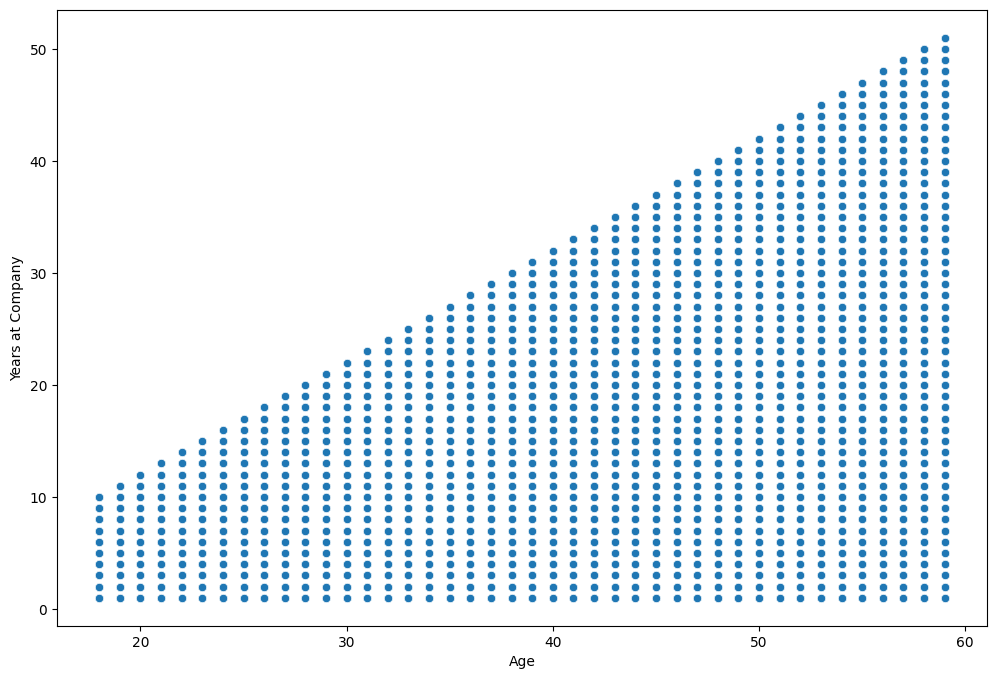

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age',y='Years at Company',data=data)
plt.show()

### Train Test Split

In [58]:
x=data.drop('Employee ID',axis=1)
y=data['Employee ID'].values.reshape(-1,1)

In [59]:
y=data['Employee ID'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

Modelling

In [72]:
#K Fold Cross Validation
kfold_validator=KFold(10,shuffle=True,random_state=42)

In [74]:
#Logistic Regression
log_reg=LogisticRegression()
cv_result_log_reg=cross_val_score(log_reg,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Logistic Regression Model:', cv_result_log_reg.mean())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Female'


In [69]:
#KNN
knn=KNeighborsClassifier()
cv_result_knn=cross_val_score(knn,x_train.values,y_train,cv=kfold_validator)
print('Average cross validation score of KNN Model:', cv_result_knn.mean())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Male'

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Female'


In [ ]:
#Decision Tree
dt_clf=DecisionTreeClassifier()
cv_result_dt_clf=cross_val_score(dt_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Decision Tree Model:', cv_result_dt_clf.mean())

In [ ]:
#Random Forest
rf_clf=RandomForestClassifier()
cv_result_rf=cross_val_score(rf_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Random Forest Model:', cv_result_rf.mean())